## THERMODYNAMICS NUMPROJ 3 Alexander, Denis, Emil

### 1a

Given Wan Der Waals equation for 1 molar substance $$ p =  \frac{R T}{V-b} -  \frac{a}{V^{2}} $$ 
We are interested in expressing a and b as function of $T_{c}$, $V_{c}$, $p_{c}$ (temperature, volume and pressure at the ciritical point) $$ $$
For a critical isoterm expression above: $p(V)$ with $T_{c}-const$, has a sadle point at the citical value meaning: 
$$ \frac{\partial p}{\partial V}|_{c} = 0 \hspace{1cm} \frac{\partial^2 p}{\partial V^{2}}|_{c} = 0 $$ 
Solving the derivative of VdW equations gives us following expressions:
$$ \Rightarrow T_{c} = \frac{8a}{27Rb}, \hspace{0.5cm} p_{c} = \frac{a}{27b^{2}} , \hspace{0.5cm} V_{c} = 3b $$
yilding the final expressions for a and b:
$$ a = \frac{27R^{2}T_{c}^{2}}{64p_{c}} \hspace{0.5cm} b =  \frac{RT_{c}}{8p_{c}} $$
Using the following experimantal values:
$$ n = 1[mol], \hspace{0.3cm} R = 8.314 [J/mol K], \hspace{0.3cm} T_{c} = 647.096 [K], \hspace{0.3cm} p_{c} = 22.064[MPa], \hspace{0.3cm} V_{c} = 55.948[ml]$$
we end up with:
$$ a = 0.55342, \hspace{0.5cm} b = 3.0479 \cdot 10^{-5}$$

In [186]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from scipy import integrate
from matplotlib.patches import Rectangle
import matplotlib.backends.backend_pdf
plt.style.use("dark_background")
plt.rcParams['figure.dpi'] = 200

In [88]:
R = 83.14                       #[mL.bar.K-1.mol-1] Gas constant
N_A = 6.02214076e23             #[1.mol-1] Avogadros number
T_c = 647.096                   #[K] critical temperature
p_c = 220.64                    #[bar] critical pressure
a = (27*R**2*T_c**2)/(64*p_c)   #[mL^2.bar.mol-2]
b = (R*T_c)/(8*p_c)             #[mL.mol-1]
V_c = 3*b                       #[mL]
V_c_exp = 55.948                #[mL]
p_surr = 1                      #[atm]

print(f"Critical Volume (calculated) V_C = 3*b: {V_c} [mL]")
print(f"Difference from experimental value: {V_c-V_c_exp:.5f} [mL]")

Critical Volume (calculated) V_C = 3*b: 91.43779704496012 [mL]
Difference from experimental value: 35.48980 [mL]


### 1b

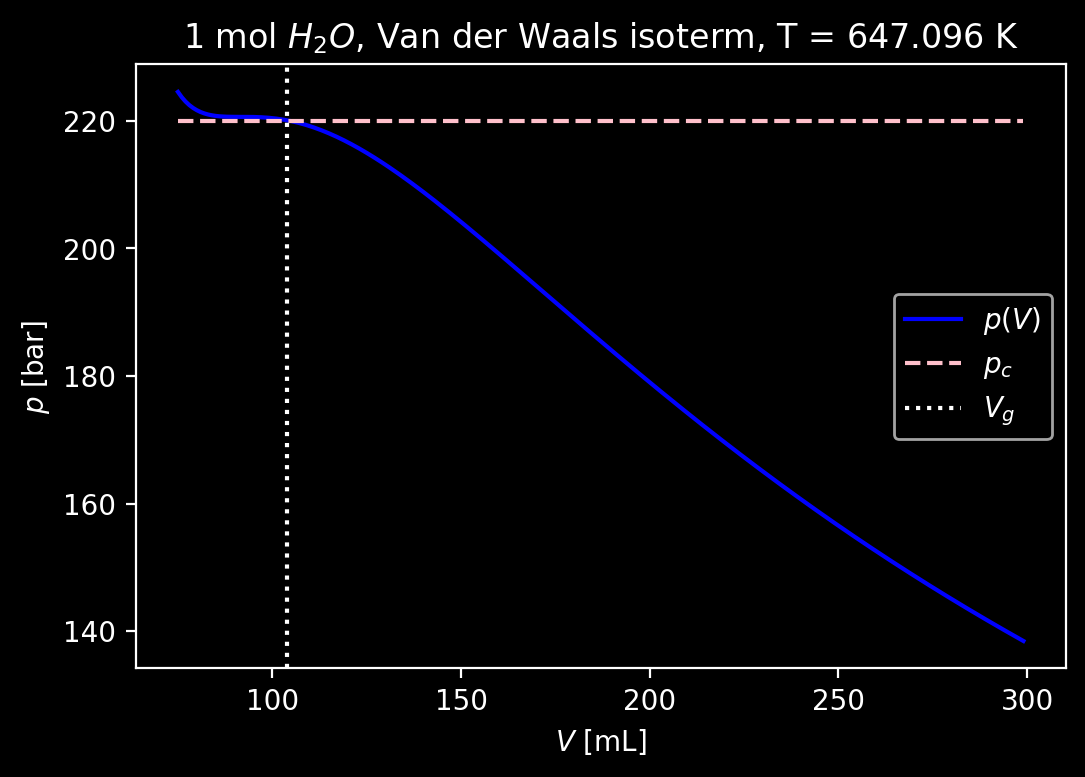

In [89]:
def p_VDW(T, V):
    return (R*T)/(V-b) - (a)/(V**2)

V_vals = np.arange(75, 300)
P_vals = p_VDW(T_c, V_vals)
P_0 = np.ones(P_vals.size)*220

plt.plot(np.arange(75, 300), P_vals, label = "$p(V)$", color = 'blue')
plt.plot(np.arange(75, 300), P_0, '--', label = "$p_{c}$", color = 'pink')

idx = np.argwhere(np.diff(np.sign(P_vals- P_0))).flatten()
plt.axvline(x = V_vals[idx], ls = 'dotted', label = '$V_{g}$', color = 'white')
plt.xlabel("$V$ [mL]")
plt.ylabel("$p$ [bar]")
plt.title(f"1 mol $H_{2}O$, Van der Waals isoterm, T = {T_c} K")
plt.legend()
plt.show()

Physical explanation: the graph above represents a Van der Waals isoterm depicting pressure in relation to volume. The expression has a damping factor that decreases with volume^2. The effect of $a$ (froces due to molecule interactions) is therefore most noticable in the first stage of the curve. Between volume values of arround $V_{l}$ and a little past $V_{g} = 100$, the Van der Waals isoterm is non-physical and is instead replaced with the constant value of pressure $p_{c}$ on this intervall of evarpration/condensation. 

Notice that this takes effect for isoterms where temperature is lower than the critical temperaure $T_{c}$. For the graph above we plot how the isorerm will look like for critical temperature (647K). Volume expansion / compression becomes siginificanly smaller as temperature starts to approach $T_{c}$. At the ciritical point where wapor and liquid coexist, the difference in volume becomes 0. This is visually seen by how much less upwardly concave the first part of the graph is and consequently we observe the two points of intersection between $p(V)$ and $p_{c}$ becomming **a** point. Mathematically the concaveness is explained through the relative difference between the postivie and negative term in Van Der Waals equation that is steered by values og $a$ and $T$. If $a$ is fixed, then higher $T$ makes the drop caused by the negative term less significant.    

### 1c

In [90]:
def f(T):
    return 1-np.sinh(2/T)**2
def f_prime(T):
    return 4*np.cosh(2/T)*np.sinh(2/T)/T**2

def newton_method(T_init, tol, k = 1000):
    i = 0
    T_vals = np.array([])
    while (True):
        if (i >= k):
            print(f"Forced exit, iter > {k}")
            break
        T_new = T_init - f(T_init)/f_prime(T_init)
        if np.abs(f(T_new)) <= tol:
            T_vals = np.append(T_vals, T_new)
            i += 1
            return T_vals, i
        T_vals = np.append(T_vals, T_new)
        T_init = T_new
        i += 1

def analytical_solution(c = 1):
    return 2*c / np.log(1+np.sqrt(2))

In [91]:
T_asol = analytical_solution()
print(f"Analytical Solution: {T_asol}")

T_init = 1
T_vals, iter = newton_method(T_init, tol = 1e-5)
T_new = T_vals[-1]
print(f"Newtons method, Initial value = {T_init}, {iter} iterations; Result: {T_new}; Error: {abs(T_new - T_asol)}")

T_init = 2
T_vals, iter = newton_method(T_init, tol = 1e-5)
T_new = T_vals[-1]
print(f"Newtons method, Initial value = {T_init}, {iter} iterations; Result: {T_new}; Error: {abs(T_new - T_asol)}")

T_init = 3
T_vals, iter = newton_method(T_init, tol = 1e-5)
T_new = T_vals[-1]
print(f"Newtons method, Initial value = {T_init}, {iter} iterations: Result: {T_new}; Error: {abs(T_new - T_asol)}")

T_init = 4
T_vals, iter = newton_method(T_init, tol = 1e-5)
T_new = T_vals[-1]
print(f"Newtons method, Initial value = {T_init}, {iter} iterations: Result: {T_new}; Error: {abs(T_new - T_asol)}")

Analytical Solution: 2.269185314213022
Newtons method, Initial value = 1, 7 iterations; Result: 2.2691852638079553; Error: 5.040506678710699e-08
Newtons method, Initial value = 2, 3 iterations; Result: 2.2691779337256586; Error: 7.380487363484178e-06
Newtons method, Initial value = 3, 5 iterations: Result: 2.2691845677702487; Error: 7.464427733694379e-07
Newtons method, Initial value = 4, 8 iterations: Result: -2.26918474774055; Error: 4.538370061953572


### 1d

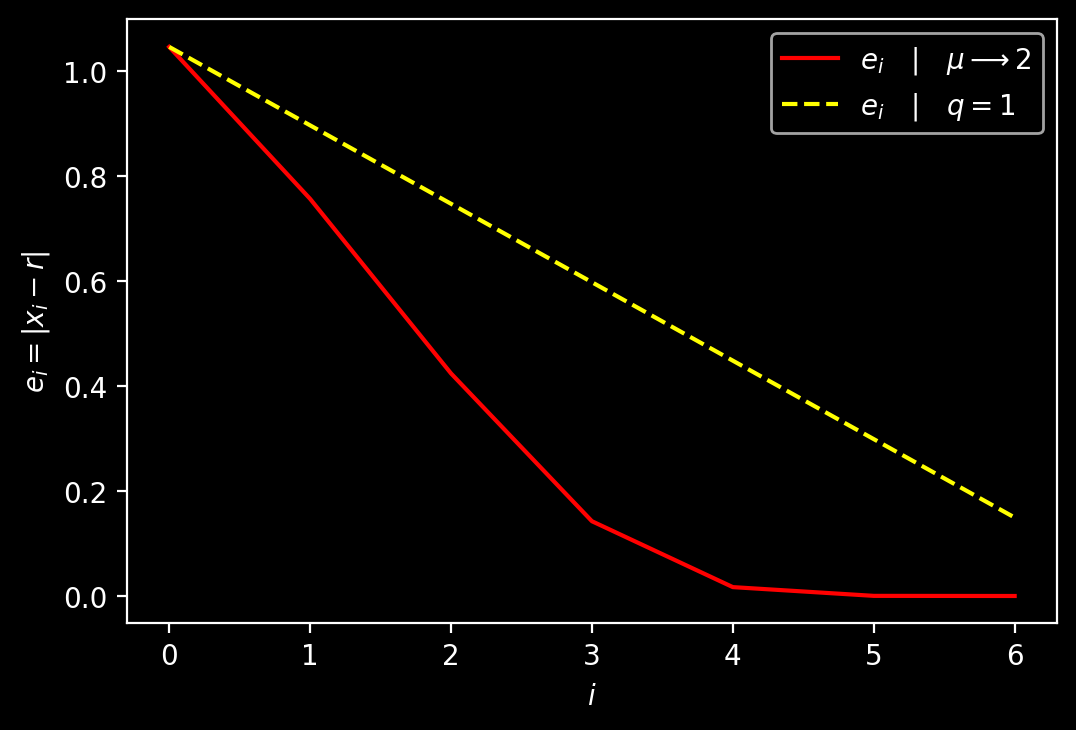

[1.78747813 1.883688   1.95398281 1.99020774 1.99936115]
Max: 1.9993611545351548, Mean: 1.9229435677434055


In [92]:
T_init = 1
T_vals, iter = newton_method(T_init, tol = 1e-5)
T_new = T_vals[-1]

e_vals = np.abs(T_vals - T_asol)

def linear_err(e_vals, T_vals):
    a = (e_vals[-1]-e_vals[0])/e_vals.size
    b = e_vals[0]
    return a*T_vals + b 

plt.plot(np.arange(e_vals.size), e_vals, label = '$ e_{i} \quad | \quad \mu \longrightarrow 2 $', color = 'red')
plt.plot(np.arange(e_vals.size), linear_err(e_vals, np.arange(e_vals.size)), ls = '--', label = '$ e_{i} \quad | \quad q = 1$', color = 'yellow')
plt.xlabel("$i$")
plt.ylabel("$e_{i} = | x_{i} - r |$")
plt.legend()
plt.show()

p_vals = np.array([])
for i in range(2, e_vals.size):
    p_vals = np.append(p_vals, np.log(e_vals[i]/e_vals[i-1])/np.log(e_vals[i-1]/e_vals[i-2]))

print(p_vals)
p_vals = np.sort(p_vals)
print(f"Max: {np.max(p_vals)}, Mean: {np.mean(p_vals)}")

Comments on 1e: $$ $$
One of the biggest weaknesses of Newtons metod is the neccacity of intial value being close to the true root value (forcing us to have the root pre-calculated). Above we try the method with different itnial values such as 1, 2, 3 (the root is 2.27). Not suprisingly initial closeness to the root ressults in fewer iterations. Already for value 5 our program will take too many iterations and the programm ressovles to a force exit. 
Another issue (that is attributed to the spesific problem rather than the method) is that our fucntion and its derivative are even and odd respectively. If we take a number like 4 (it is high enough to jump past the root and close enough to finish), it will en up approaching our root from the negative side and finally outputs the correct value, but as a negative. 

Comments on 1d: $$ $$
For each iteration we save the error $e_{i} = | x_{i}-r | $ where $r$ is the root. Above plot demonstrates how the error decreases with each step vs if it kept converging linearly. The numerical method has a sublinear error propogation. We can calculate the convergence rate using following equation:
$$ p_{i} = \frac{log(e_{i} / e_{i-1})}{log(e_{i-1}/ e_{i-2})} $$
If we record the convergence rate for $i-1$ steps we notice how the value approaches gradually $q = 2$. This agrees with the quadratic convergence rate for the Newton method.

### 1e

$$p_0 = \frac{RT}{V_g - b} - \frac{a}{V_g^2} = \frac{RT}{V_v - b} - \frac{a}{V_v^2}$$

$$\frac{RT}{V_g-V_v}ln\frac{V_g - b}{V_v - b} - \frac{a}{V_g V_v} - \frac{RT}{V_g - b} + \frac{a}{V_g^2}$$

In [93]:
Vg, Vv= sym.symbols('Vg Vv')

T_arr = np.arange(274,647,1)

def Newton_mult(f_arr,jacobian,x0,tol=1e-5, max_iter = 1000):
    error = 1
    i = 0
    x = []
    x.append(x0)
    while np.any(tol<error) and i<max_iter:
        func_eval = np.array([f_arr[0](x[-1]),f_arr[1](x[-1])])
        jac_eval = np.array([[jacobian[0][0](x[-1]),jacobian[0][1](x[-1])],
                             [jacobian[1][0](x[-1]),jacobian[1][1](x[-1])]])
        if np.linalg.det(jac_eval)!=0:
            jacobian_inv =np.linalg.inv(jac_eval) 
            x.append(x[-1] - jacobian_inv@func_eval)
            error = np.abs(x[-1]-x[-2])
        i+=1
    return x,error,i

def solve_for_V(T_arr):
    solutions = []
    errors = []
    x0 = (12600,35.6)

    for T in T_arr:    
        f = (R*T)/(Vg-b) - a/(Vg**2) - R*T/(Vv-b) + a/(Vv**2)
        g = (R*T)/(Vg-Vv)*sym.ln((Vg-b)/(Vv-b)) - a/(Vv*Vg) - R*T/(Vg-b) + a/(Vg**2)
        
        # dfdVg = lambda Vg,Vv,T: 2*a/Vg**3 - R*T/((Vg-b)**2)
        # dfdVv = lambda Vg,Vv,T: -2*a/Vv**3 + R*T/((Vv-b)**2)
        
        # dgdVg = lambda Vg,Vv,T: -2*a/Vg**3 + a/(Vg**2*Vv) + R*T/((Vv-b)*(Vg-Vv)) - R*T*np.log((Vg-b)/(Vv-b))/((Vg-Vv)**2) + R*T/((Vg-b)**2)
        # dgdVv = lambda Vg,Vv,T: a/(Vg*Vv**2) - R*T/((Vv-b)*(Vg-Vv)) + R*T*np.log((Vg-b)/(Vv-b))/((Vg-Vv)**2)
        
        dfdVg = sym.diff(f,Vg)
        dfdVv = sym.diff(f,Vv)
        dgdVg = sym.diff(g,Vg)
        dgdVv = sym.diff(g,Vv)

        f_func = sym.lambdify(((Vg,Vv),),f,'numpy')
        g_func = sym.lambdify(((Vg,Vv),),g,'numpy')

        dfdVg_func = sym.lambdify(((Vg,Vv),),dfdVg,'numpy')
        dfdVv_func = sym.lambdify(((Vg,Vv),),dfdVv,'numpy')
        dgdVg_func = sym.lambdify(((Vg,Vv),),dgdVg,'numpy')
        dgdVv_func = sym.lambdify(((Vg,Vv),),dgdVv,'numpy')

        jacobian = [[dfdVg_func, dfdVv_func], [dgdVg_func, dgdVv_func]]

        temp = Newton_mult([f_func, g_func],jacobian,x0)
        solutions.append(temp[0][-1])
        errors.append(temp[1])
        x0 = temp[0][-1]

    solutions = np.array(solutions).T
    return solutions, errors

In [94]:
solutions,errors = solve_for_V(T_arr)
Vg = solutions[0]
Vv = solutions[1]
V_delta = Vg - Vv

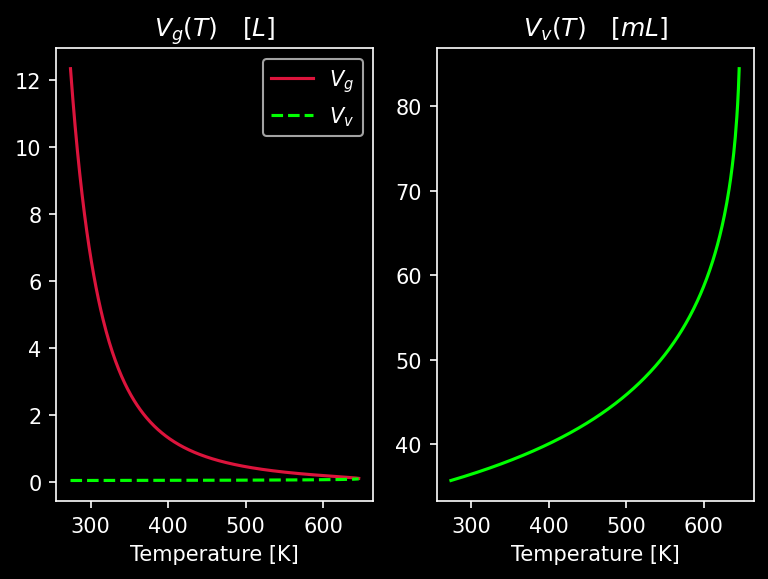

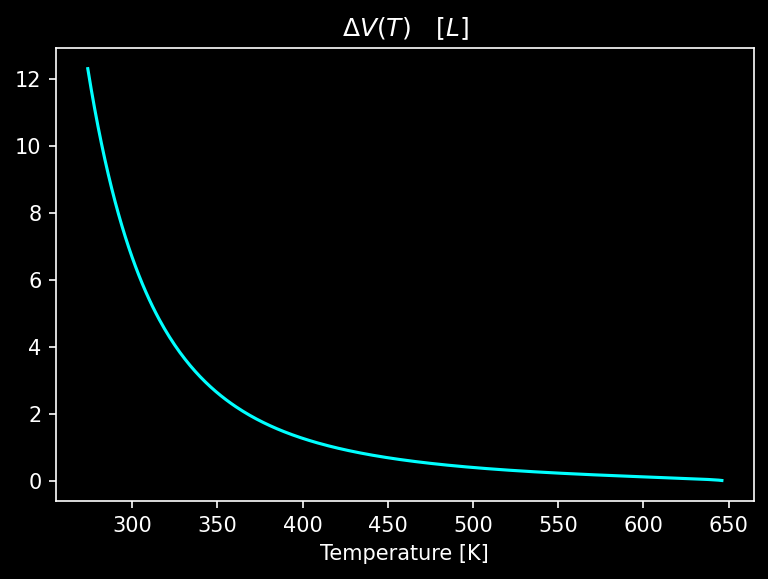

In [95]:
plt.rcParams['figure.dpi'] = 150

fig_1e, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
ax1.plot(T_arr, Vg*1e-3, color = 'crimson', label = '$V_{g}$')
ax1.plot(T_arr, Vv*1e-3, ls = "--", color = 'lime', label = '$V_{v}$')
ax1.set_title("$V_{g}(T) \quad [L] $")
ax1.set_xlabel("Temperature [K]")
ax1.legend()

ax2.plot(T_arr, Vv, color = 'lime')
ax2.set_title("$V_{v}(T) \quad [mL] $")
ax2.set_xlabel("Temperature [K]")
plt.show()

fig_2e = plt.subplot()
plt.plot(T_arr, V_delta*1e-3, color = 'aqua')
plt.title("$\Delta V(T) \quad [L] $")
plt.xlabel("Temperature [K]")
plt.show()

Graphs above show development in volume of water in its vapor and liquid phases as temperature increases. As we can expect a gass to take up a much larger volume than a liquid we observe how insignificant $V_{v}$ is to $V_{g}$ inititally. However when viewed sperately we notice that volume of vapor increases while liquidous phase increases. This leads to $\Delta V(T)$ decreasing, meaning that the regions of gasseus and liquid phases of water grow closer with increasing temperature. As temperature approaches the critical value 647K this gap is nearly zero. At the critical region we can expect the avreage gas and liquid volumes of a particle to be the same. 

### 1f

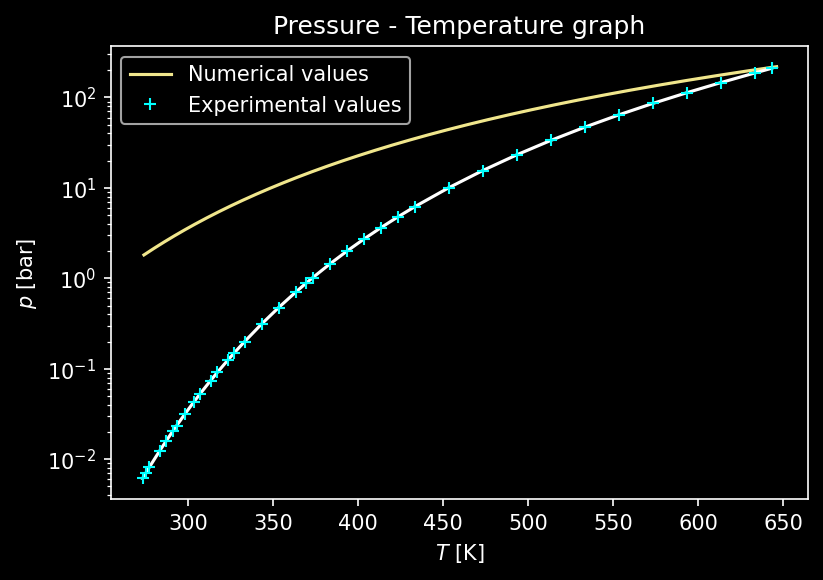

In [96]:
pressure = np.array([0.61165, 0.70599, 0.81355, 1.2282, 1.5990, 2.0647, 2.3393, 3.1699, 4.2470, 5.3251, 7.3849, 9.1124, 12.352, 15.022, 19.946, 31.201, 47.414, 70.182, 87.771, 101.42, 143.38, 198.67, 270.28, 361.54, 476.16, 618.23, 1002.8, 1554.9, 2319.6, 3346.9, 4692.3, 6416.6, 8587.9, 11284, 14601, 18666, 21044])*1e-2 #Bar
Temperature_pressure = np.array([0.01, 2, 4, 10, 14, 18, 20, 25, 30, 34, 40, 44, 50, 54, 60, 70, 80, 90, 96, 100, 110, 120, 130, 140, 150, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 370])+273.15 #Kelvin

Temperature = np.arange(280, 640, 20, dtype=float) #kelvin
Temperature = np.insert(Temperature, 0, 273.16)
Temperature = np.append(Temperature, 647.1)

p_vapour_constV = p_VDW(T_arr, Vg)
p_liquid_constV = p_VDW(T_arr, Vv)


figure_f = plt.subplot()
#plt.plot(T_arr, p_vapour_constV, label = 'Numerical values $p_{g}$')
plt.plot(T_arr, p_liquid_constV, label = 'Numerical values', color = 'khaki')
plt.plot(Temperature_pressure, pressure, color = 'white')
plt.plot(Temperature_pressure, pressure, color='cyan', marker='+', linestyle='None', label='Experimental values') 
plt.yscale('log')
plt.xlabel('$T$ [K]')
plt.ylabel('$p$ [bar]')
plt.title("Pressure - Temperature graph")
plt.legend()
plt.show()

Above we show how our calculatations of compare to experimental data collected from Engineering Toolbox (29.3.2023) [source]. We seek to accent the deviation by using loged scale. From the plot we see that the deviation is greatest for  lowest temperatures. This is not just the ressult of numerical errors, but can be traced to the limitiations of VDW equation itself. As showed in **1a**, VDW equation relies og $a$ and $b$ that were calculated using critical pressure and temperature values (from internet). While fixing that themperture and pressure we somewhat sacrificed critical volume making our numerical assumed value to be different from the acutal experimental (this deviation is shown in **1a**). Next we asumed them both to be constant, wich is false and both will vary with thermodynamic conditions. The repecussions of our choises of a and b are more evident further away from the cirical point, therefore we notice great deviation for lowest temperatures. 

### 1g

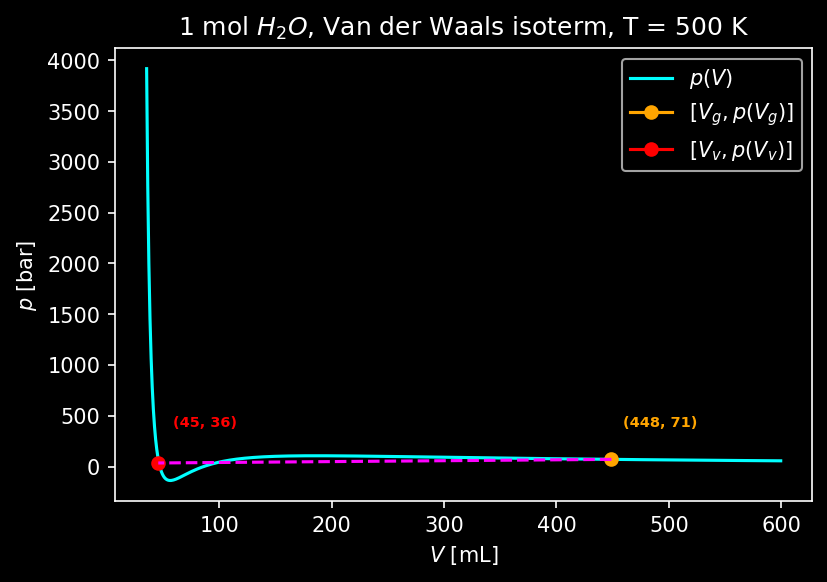

In [97]:
T_const = 500 #[K]
V = np.arange(b+5, 600)
p_constT = p_VDW(T_const,V)

plt.figure('figure_1g')
plt.plot(V, p_constT, color = 'cyan', label = '$p(V)$')
point_1 = [ Vg[ T_arr == T_const ], p_constT [np.rint(V) == np.rint(Vg[ T_arr == T_const ])] ] 
point_2 = [ Vv[ T_arr == T_const ], p_constT [np.rint(V) == np.rint(Vv[ T_arr == T_const ])] ] 
plt.plot(point_1[0], point_1[1], color = 'orange', marker = 'o', label = '$[V_{g} , p(V_{g})]$')
plt.plot(point_2[0], point_2[1], color = 'red', marker = 'o', label = '$[V_{v} , p(V_{v})]$')
plt.figtext(0.69, 0.25, f"({int(point_1[0][0])}, {int(point_1[1][0])})", fontsize = 'x-small', fontweight = 'bold', color = 'orange', rotation="horizontal")
plt.figtext(0.19, 0.25, f"({int(point_2[0][0])}, {int(point_2[1][0])})", fontsize = 'x-small', fontweight = 'bold', color = 'red', rotation="horizontal")
plt.plot([point_1[0], point_2[0]], [point_1[1], point_2[1]], ls = '--', color = 'magenta')
plt.xlabel('$V$ [mL]')
plt.ylabel('$p$ [bar]')
plt.title(f"1 mol $H_{2}O$, Van der Waals isoterm, T = {T_const} K")
plt.legend()
plt.show()

Above is different example of a VDW isoterm, this time for a temperature lower than $T_{c}$. As previously discussed the concaveness of the graph is effected by the ratio between the positive and negative terms in the equation. Temperature decreasing leads to a more significant effect of the negative term. For sub-ciritcal temperatures there will be a gap between the liquid and vapor phases. We mark $V_{g}$ and  $V_{v}$ aswell as their corresponding pressures. Between these points VDW equation yields no physical solution, and so this porition of the graph gets replaced by constant pressure (marked as a dashed line in the plot). 

### 1h

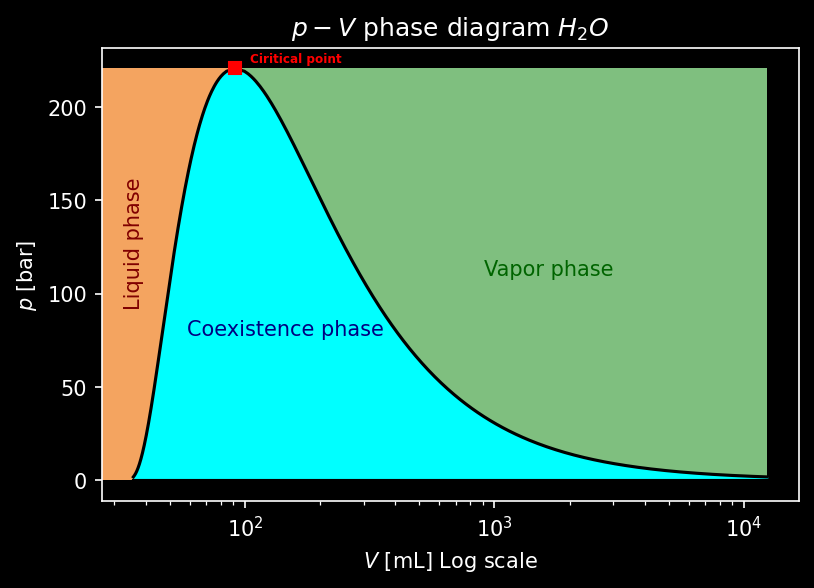

In [98]:
V = np.append(Vv, V_c)
V = np.append(V,np.flip(Vg))

p = np.append(p_liquid_constV,p_c)
p = np.append(p,np.flip(p_vapour_constV))

#V = np.array([Vv,V_c,Vg])
#p = np.array([p_liquid_constV,p_c,p_vapour_constV])

plt.gca().add_patch(Rectangle((0,0),V[-1],p_c,facecolor='white',alpha=1))
plt.gca().add_patch(Rectangle((0,0),V_c,p_c,facecolor='sandybrown',alpha=1))
plt.gca().add_patch(Rectangle((V_c,0),V[-1],p_c,facecolor='green',alpha=0.5))

plt.plot(V, p, color='black')
plt.plot(V, 611.657*1e-5*np.ones(V.size), color ='black', label = 'liquid/solid_coexistence')
plt.fill_between(V, p, alpha=1, color='cyan')
#plt.plot(np.insert(V,0,0),np.ones(V.size+1)*p_c)
plt.plot(V_c, p_c, 'rs', label = 'Critical Point')
plt.title('$p-V$ phase diagram $H_{2}O$')
plt.xlabel('$V$ [mL] Log scale')
plt.ylabel('$p$ [bar]')
plt.figtext(0.15, 0.45, "Liquid phase", color = 'maroon', rotation="vertical")
plt.figtext(0.22, 0.4, "Coexistence phase", color = 'navy', rotation="horizontal")
plt.figtext(0.55, 0.5, "Vapor phase", color = 'darkgreen', rotation="horizontal")
plt.figtext(0.29, 0.855, "Ciritical point", fontsize = 'xx-small', fontweight = 'bold', color = 'red')
plt.xscale('log')
plt.show()

Above plot showcases a $PV$-phase diagram for water. We mark liqid, vapor and coexistence phases aswell as the critical point. The "idea" of the shape of the regions has somewhat already been foreshadowed by the different isotherms. Had we descided to project a number VDW isoterms in the same picture we likewise would start with a large speraation between vapor and liquid phases and for each isoterm nearing $T_{c}$ this speration would decline.  
We also notice the seperation between vapor and coexsitence regions is sloped similar to $p  \sim  \frac{1}{V}$. This makes sense since if we had water at this point, most of it would be in gassus state.  
Liquid-coex line?
Tripple line?

### 2a

In [105]:
weight1mol = 18.01528*1e-3 #mass of 1 mole water [Kg]

#Temperature [K]
Temperature = np.arange(280, 640, 20, dtype=float)
Temperature = np.insert(Temperature, 0, 273.16)
Temperature = np.append(Temperature, 647.1)
Temperature_pressure = np.array([0.01, 2, 4, 10, 14, 18, 20, 25, 30, 34, 40, 44, 50, 54, 60, 70, 80, 90, 96, 100, 110, 120, 130, 140, 150, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 370])+273.15

Temperature_latent_heat = np.array([0.01, 2, 4, 10, 14, 18, 20, 25, 30, 34, 40, 44, 50, 54, 60, 70, 80, 90, 96, 100, 110, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 373.946]) + 273.15 
latent_heat = np.array([2500.9, 2496.2, 2491.4, 2477.2, 2467.7, 2458.3, 2453.5, 2441.7, 2429.8, 2420.3, 2406.0, 2396.4, 2381.9, 2372.3, 2357.7, 2333.0, 2308.0, 2282.5, 2266.9, 2256.4, 2229.6, 2202.1, 2144.3, 2082.0, 2014.2, 1939.7, 1857.4, 1765.4, 1661.6, 1543.0, 1404.6, 1238.4, 1027.3, 719.8, 0.0])*weight1mol*1e3 
#Latent heat delta_H_vap [kJ]

#[Kg/m^3]
density_liquid = np.array([999.8, 999.9, 996.5, 989.4, 979.5, 967.4, 953.3, 937.5, 919.9, 900.7, 879.6, 856.5, 831.3, 788.5, 737.8, 674.8, 586.9, 544.2, 481.5, 322.0])
density_vapour = np.array([0.00485, 0.00767, 0.02558, 0.07166, 0.1744, 0.3786, 0.7483, 1.369, 2.352, 3.833, 5.983, 9.014, 13.30, 22.47, 37.15, 61.24, 106.3, 132.8, 177.1, 322.0])

#[bar]
pressure = np.array([0.61165, 0.70599, 0.81355, 1.2282, 1.5990, 2.0647, 2.3393, 3.1699, 4.2470, 5.3251, 7.3849, 9.1124, 12.352, 15.022, 19.946, 31.201, 47.414, 70.182, 87.771, 101.42, 143.38, 198.67, 270.28, 361.54, 476.16, 618.23, 1002.8, 1554.9, 2319.6, 3346.9, 4692.3, 6416.6, 8587.9, 11284, 14601, 18666, 21044])*1e-2 

#[m^3]
volume_liquid = weight1mol/density_liquid*1e5 
volume_vapour = weight1mol/density_vapour*1e5 

Tabulated data above were retrieved from: 

$T$, $\Delta H$, $\rho$ values: [source](https://www.engineeringtoolbox.com/water-properties-temperature-equilibrium-pressure-d_2099.html)

$p(T)$ values: [source](https://www.engineeringtoolbox.com/water-vapor-saturation-pressure-d_599.html)

### 2b

c:\Python\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


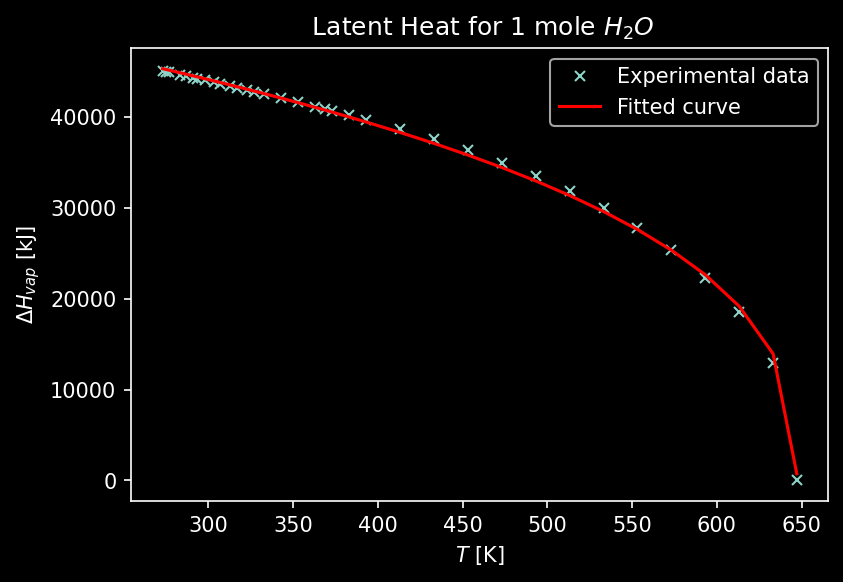

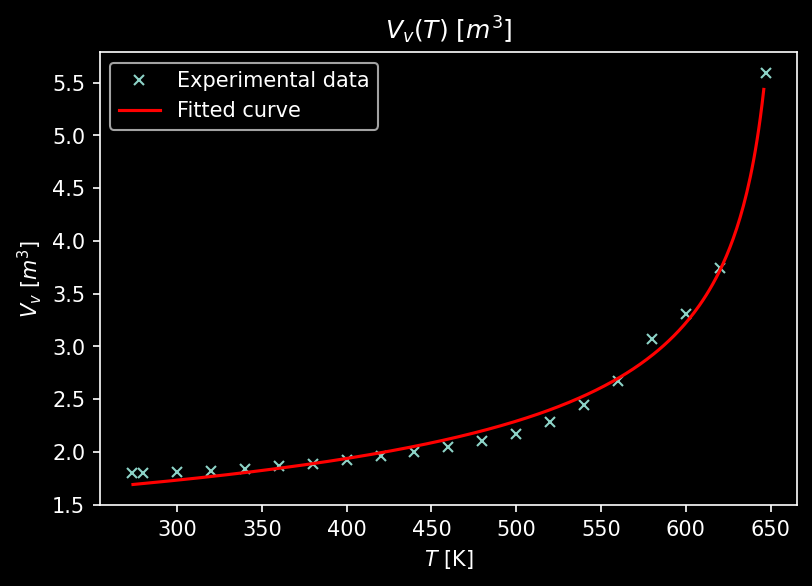

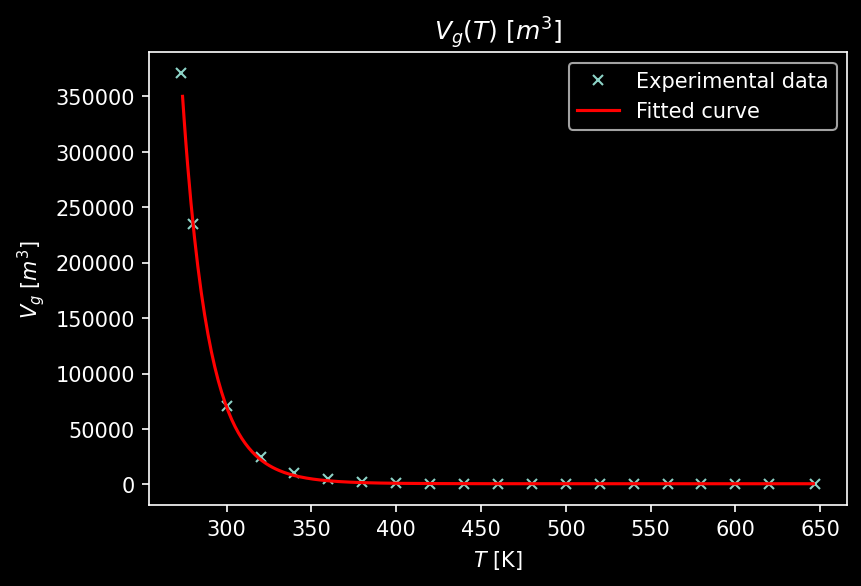

In [109]:
def latent_funk(x, a, gamma):
    return a*np.abs((647.1 - x))**gamma

def volume_funk_liquid(x, a, b, c, d):
    return a * np.abs(b - x/T_c)**c     #+d

def volume_funk_vapour(x, a, k, c):
    return a*np.abs(T_c/x)**k + c


popt_1, pcov_1 = curve_fit(latent_funk, Temperature_latent_heat, latent_heat)

pop_2, pcov_2 = curve_fit(volume_funk_liquid, Temperature, volume_liquid, maxfev=10000)

pop_3, pcov_3 = curve_fit(volume_funk_vapour, Temperature, volume_vapour)

plt.figure('2b_L')
plt.plot(Temperature_latent_heat, latent_heat, marker='x', markersize=5, linestyle='None', label='Experimental data')
plt.plot(Temperature_latent_heat, latent_funk(Temperature_latent_heat, *popt_1), 'r-', label='Fitted curve')
plt.xlabel('$T$ [K]') 
plt.ylabel('$\Delta H_{vap}$ [kJ]')
plt.title(' Latent Heat for 1 mole $H_{2}O$')
plt.legend()
plt.show()

plt.figure('2b_Vv')
plt.plot(Temperature, volume_liquid, 'x', markersize = 5, label='Experimental data')
plt.plot(T_arr, volume_funk_liquid(T_arr, *pop_2), 'r-', label='Fitted curve')
plt.xlabel('$T$ [K]') 
plt.ylabel('$V_{v}$ [$m^{3}$]')
plt.title('$V_{v}(T)$ [$m^{3}$]')
plt.legend()
plt.show()

plt.figure('2b_Vg')
plt.plot(Temperature, volume_vapour, 'x', markersize = 5, label='Experimental data')
plt.plot(T_arr, volume_funk_vapour(T_arr, *pop_3), 'r-', label='Fitted curve')
plt.xlabel('$T$ [K]') 
plt.ylabel('$V_{g}$ [$m^{3}$]')
plt.title('$V_{g}(T)$ [$m^{3}$]')
plt.legend()
plt.show()

### 2c

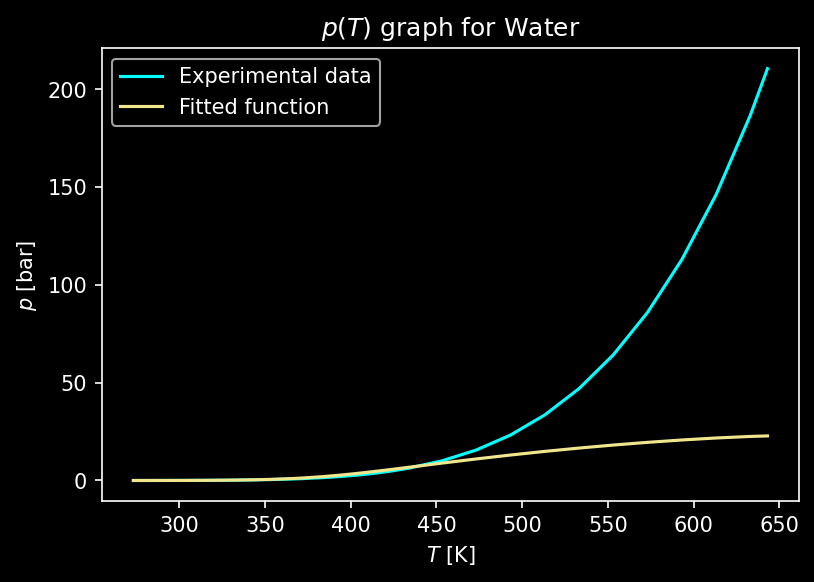

In [117]:
def delta_p(T, n=1000):
    return (latent_funk(T, *popt_1) / (T * (volume_funk_vapour(T, *pop_3) - volume_funk_liquid(T, *pop_2))))

def simpson(f, temp):
    n = 100
    h = (temp[-1] - temp[0])/n
    x = np.linspace(temp[0], temp[-1], n+1)
    y = f(x)
    return h/3 * (np.sum(2*y[0:-1:2]) + np.sum(4*y[1::2]) + y[0]+ y[-1])

def integral_arr(f, temp):
    arr = []
    for i in range(len(temp)):
        integral = simpson(f, temp[0:i+1])
        arr.append(integral)
    return arr

integral = integral_arr(delta_p, Temperature_pressure)

plt.figure('2c')                             #bo-
plt.plot(Temperature_pressure, pressure, ls = '-', color = 'cyan', label='Experimental data')
plt.plot(Temperature_pressure, integral, ls = '-', color = 'khaki', label='Fitted function')
plt.xlabel('$T$ [K]')
plt.ylabel('$p$ [bar]')
plt.title('$p(T)$ graph for Water ')
plt.legend()
plt.show()

### 2d

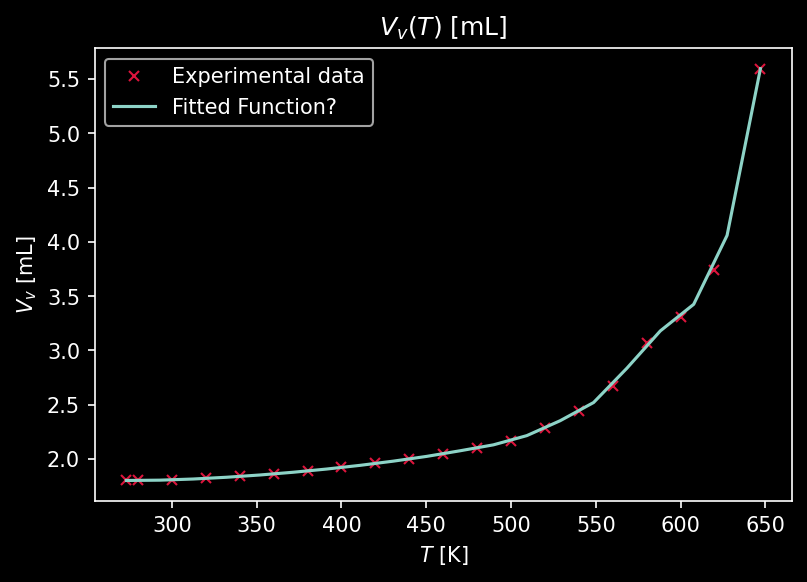

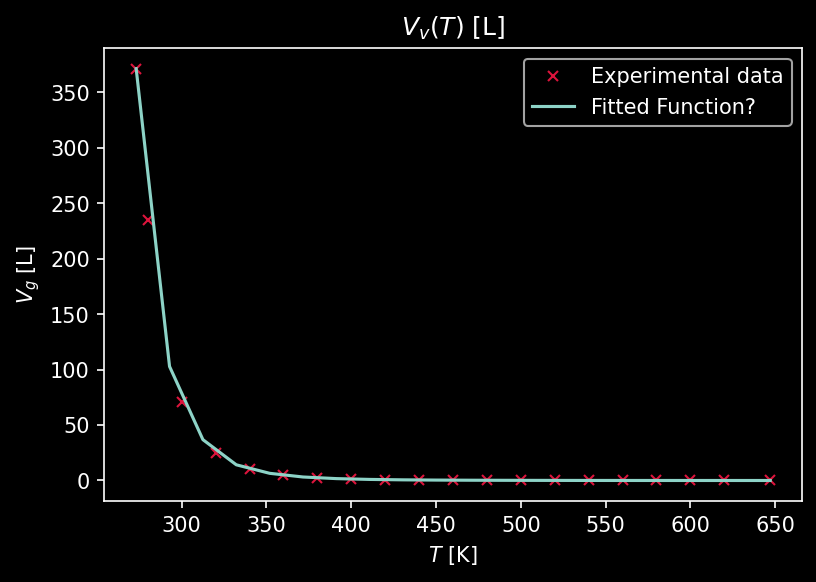

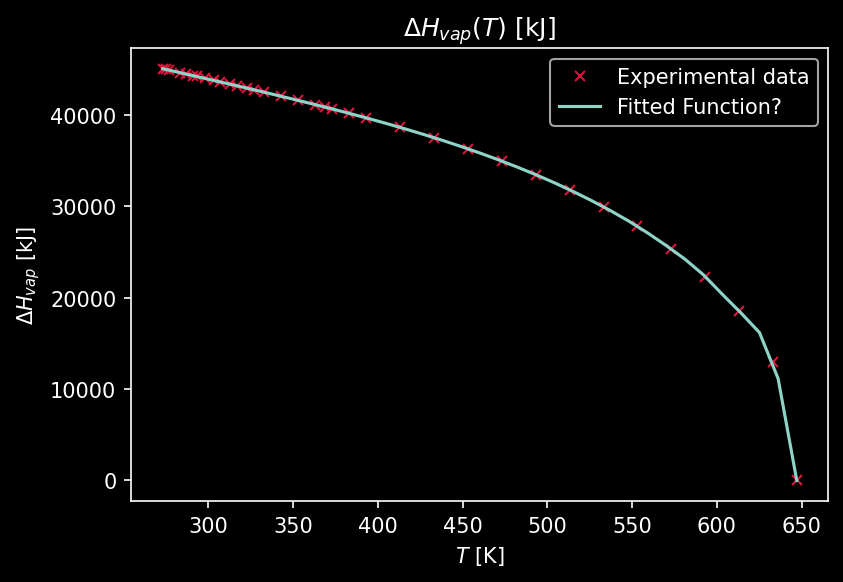

In [127]:
plt.figure('2d_Vv')
cs_volume_liquid = CubicSpline(Temperature, volume_liquid)
vl_anal = np.linspace(Temperature[0], Temperature[-1],20)
plt.plot(Temperature, volume_liquid, 'x', color = 'crimson', markersize = 5, label = 'Experimental data')
plt.plot(vl_anal, cs_volume_liquid(vl_anal), label = 'Fitted Function?')
plt.xlabel('$T$ [K]')
plt.ylabel('$V_{v}$ [mL]')
plt.title("$V_{v}(T)$ [mL]")
plt.legend()
plt.show()

plt.figure('2d_Vg')
cs_volume_vapour = CubicSpline(Temperature, volume_vapour)
vv_anal = np.linspace(Temperature[0], Temperature[-1], 20)
plt.plot(Temperature, volume_vapour*1e-3,'x', color = 'crimson', markersize = 5, label = 'Experimental data')
plt.plot(vv_anal,cs_volume_vapour(vv_anal)*1e-3, label = 'Fitted Function?')
plt.xlabel('$T$ [K]')
plt.ylabel('$V_{g}$ [L]')
plt.title("$V_{v}(T)$ [L]")
plt.legend()
plt.show()

plt.figure('2d_L')
cs_latent_heat = CubicSpline(Temperature_latent_heat, latent_heat)
lh_anal = np.linspace(Temperature_latent_heat[0], Temperature_latent_heat[-1],latent_heat.size)
plt.plot(Temperature_latent_heat,latent_heat,'x', color = 'crimson', markersize = 5, label = 'Experimental data')
plt.plot(lh_anal,cs_latent_heat(lh_anal), label = 'Fitted Function?')
plt.xlabel('$T$ [K]')
plt.ylabel("$\Delta H_{vap}$ [kJ]")
plt.title("$\Delta H_{vap}(T)$ [kJ]")
plt.legend()
plt.show()

### 2e

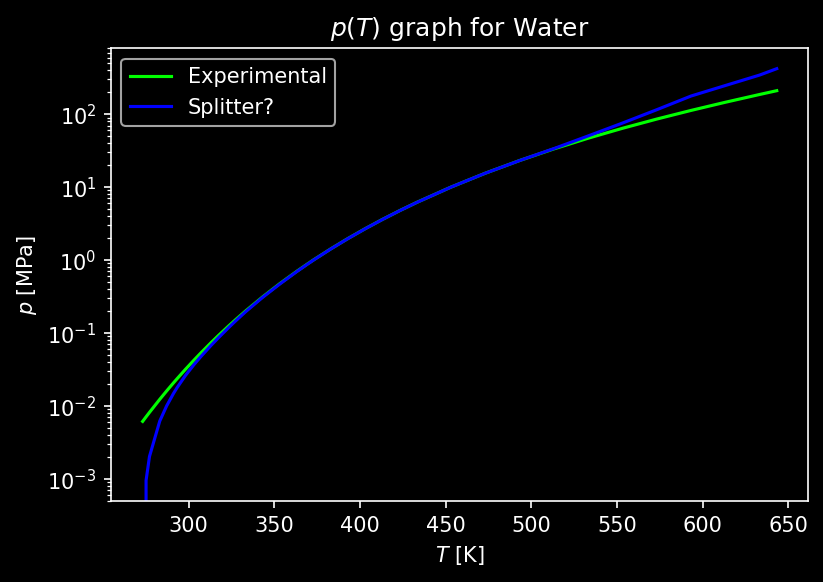

In [130]:
def delta_p_split(T):
    return cs_latent_heat(T) / (T * (cs_volume_vapour(T) - cs_volume_liquid(T)))

p_integral_spliter = np.array(integral_arr(delta_p_split, Temperature_pressure))

plt.figure('2e')
plt.plot(Temperature_pressure, pressure, color = 'lime', ls = '-', label='Experimental')
plt.plot(Temperature_pressure, p_integral_spliter, color = 'blue', ls = '-', label='Splitter?')
plt.xlabel('$T$ [K]')
plt.ylabel('$p$ [MPa]')
plt.title('Better title name')
plt.yscale("log")
plt.legend()
plt.show()

### 2f

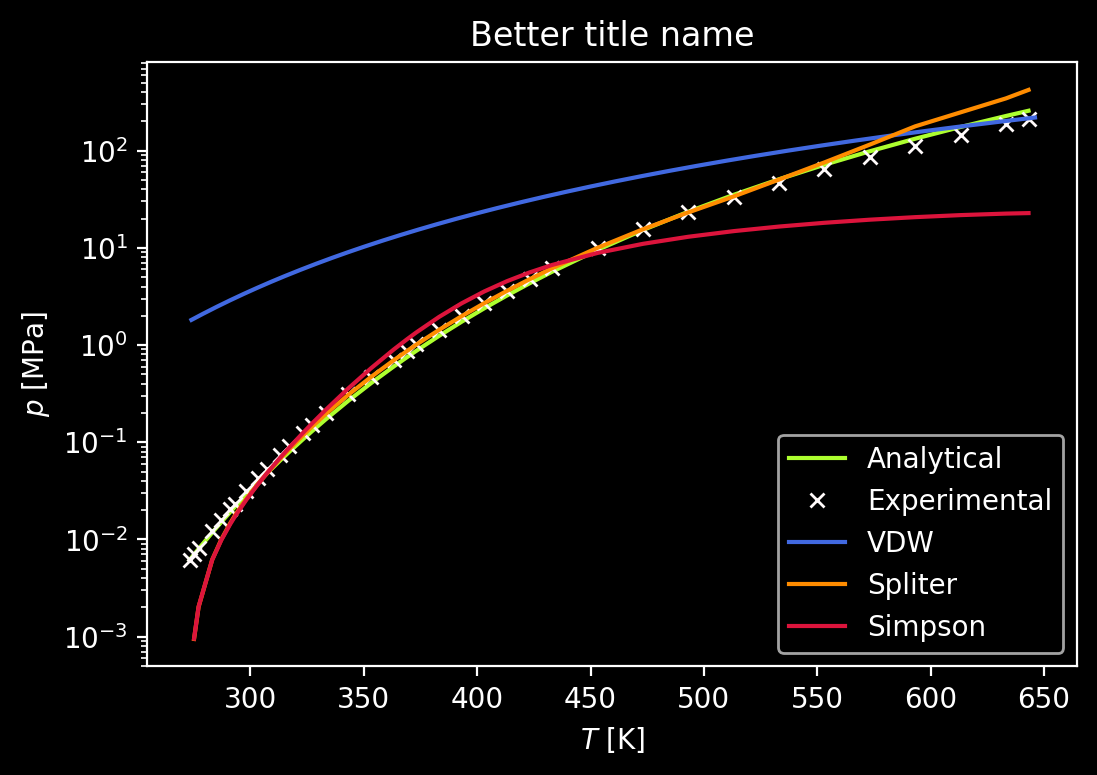

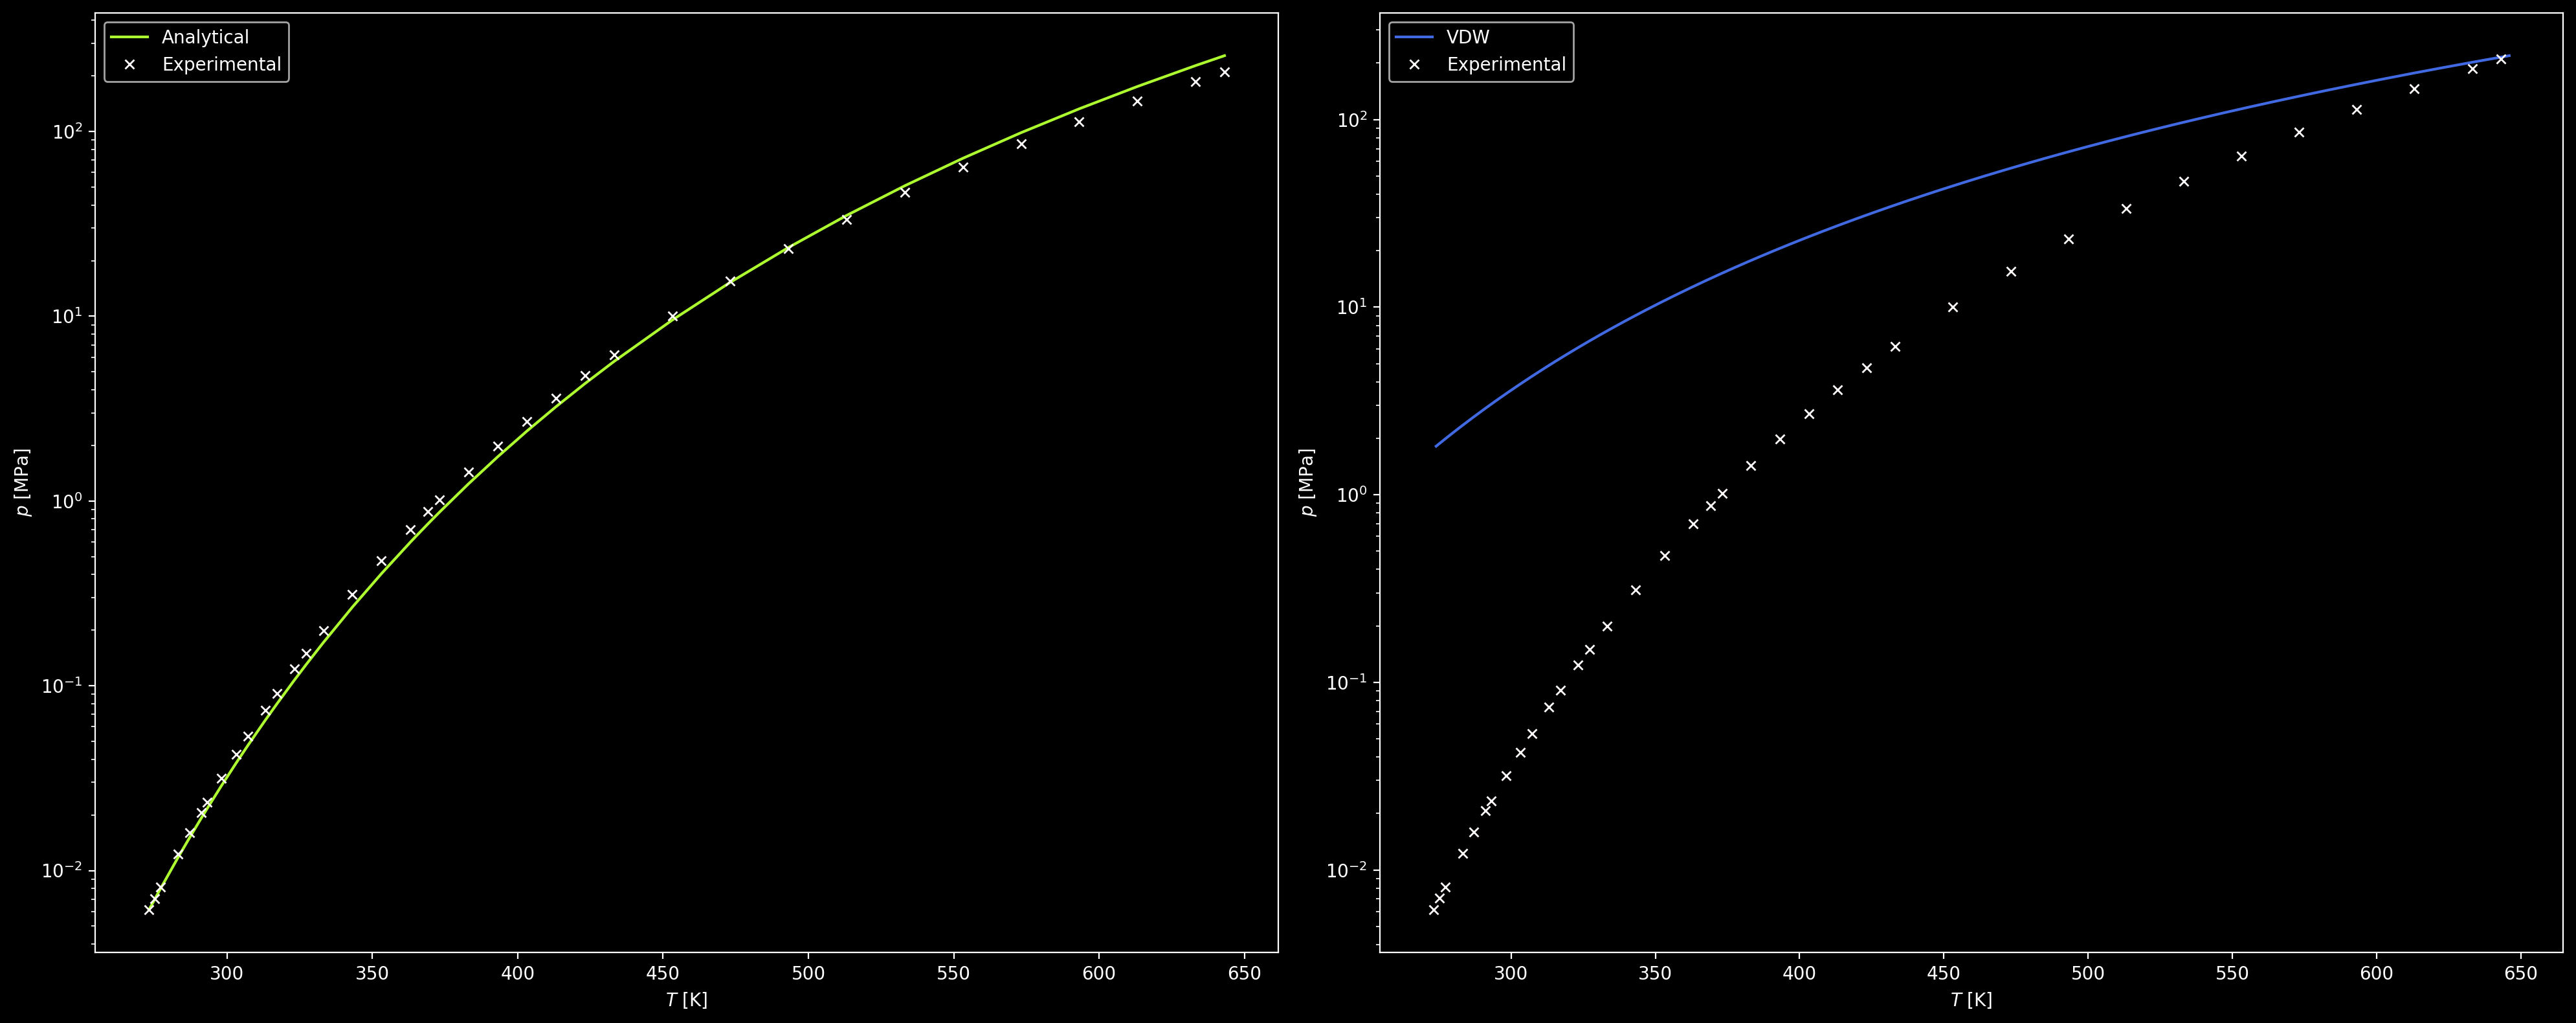

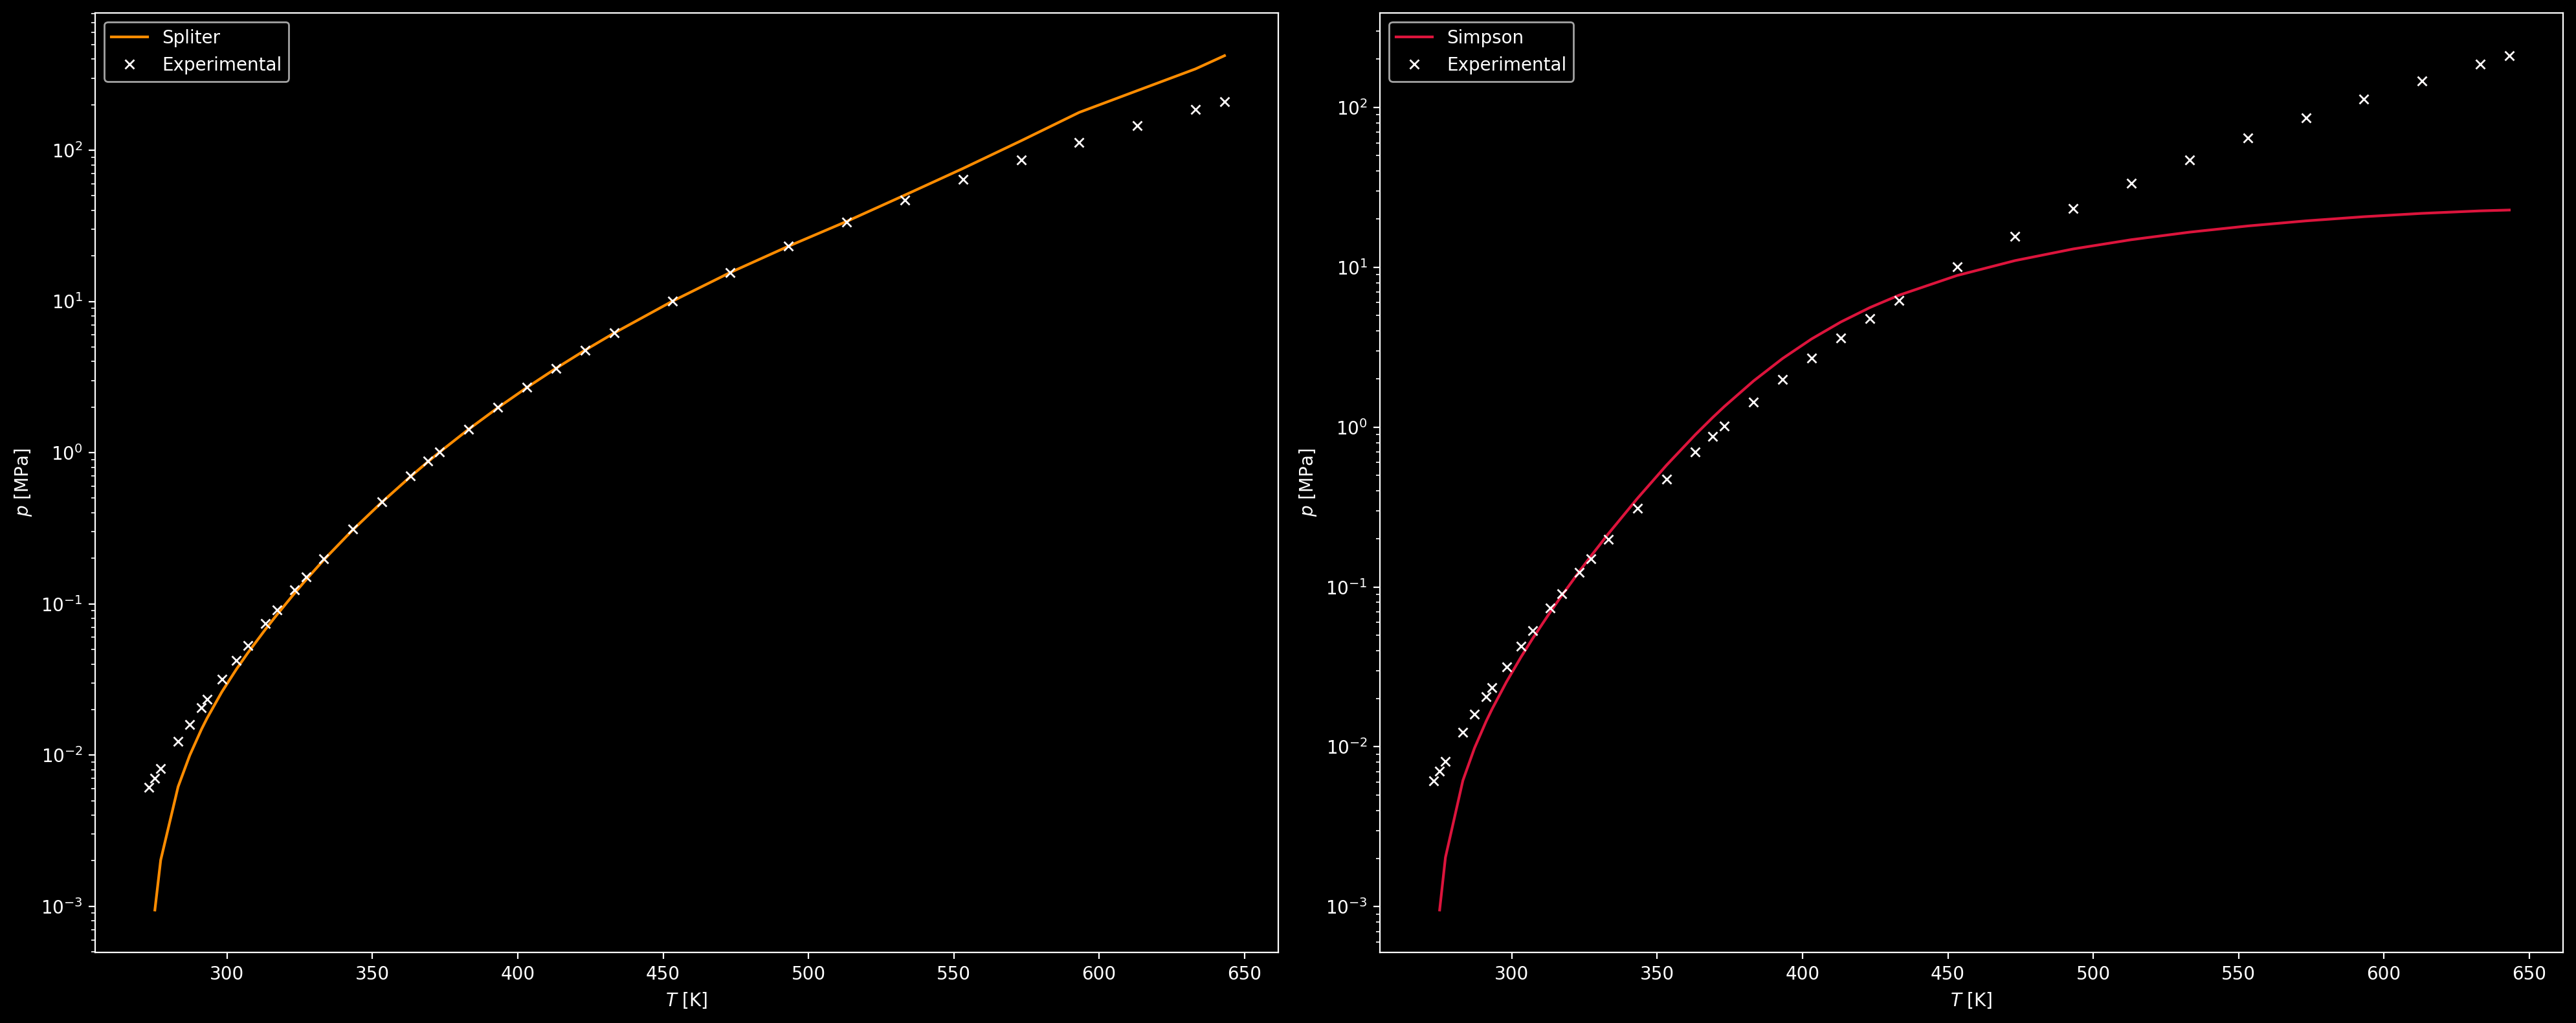

In [189]:
def p_anal(T, L, p_0, R=8.314, T_0=273.15):
    return p_0 * np.exp((L/R) * (1/T_0 - 1/T))

analytical = p_anal(Temperature_pressure, latent_heat[15], pressure[0])

plt.figure('2f_1')
plt.rcParams['figure.dpi'] = 200
plt.plot(Temperature_pressure, analytical, color = 'greenyellow', ls = '-', label='Analytical')
plt.plot(Temperature_pressure, pressure, 'x', color = 'snow', markersize = 5, label='Experimental')
plt.plot(T_arr, p_liquid_constV, color = 'royalblue', ls = '-', label='VDW')
plt.plot(Temperature_pressure[1:], p_integral_spliter[1:], color = 'darkorange', ls = '-', label='Spliter')
plt.plot(Temperature_pressure[1:], integral[1:], color = 'crimson', ls = '-', label='Simpson')
plt.xlabel('$T$ [K]')
plt.ylabel('$p$ [MPa]')
plt.title('Better title name')
plt.yscale('log')
plt.legend()
plt.show()

fig_2f_2, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

ax1.plot(Temperature_pressure, analytical, color = 'greenyellow', ls = '-', label='Analytical')
ax1.plot(Temperature_pressure, pressure, 'x', color = 'snow', markersize = 5, label='Experimental')
ax1.set_xlabel('$T$ [K]')
ax1.set_ylabel('$p$ [MPa]')
ax1.set_yscale('log')
ax1.legend()

ax2.plot(T_arr, p_liquid_constV, color = 'royalblue', ls = '-', label='VDW')
ax2.plot(Temperature_pressure, pressure, 'x', color = 'snow', markersize = 5, label='Experimental')
ax2.set_xlabel('$T$ [K]')
ax2.set_ylabel('$p$ [MPa]')
ax2.set_yscale('log')
ax2.legend()

plt.tight_layout()

fig_2f_3, (ax3, ax4) = plt.subplots(1,2, figsize=(20,8))
ax3.plot(Temperature_pressure[1:], p_integral_spliter[1:], color = 'darkorange', ls = '-', label='Spliter')
ax3.plot(Temperature_pressure, pressure, 'x', color = 'snow', markersize = 5, label='Experimental')
ax3.set_xlabel('$T$ [K]')
ax3.set_ylabel('$p$ [MPa]')
ax3.set_yscale('log')
ax3.legend()

ax4.plot(Temperature_pressure[1:], integral[1:], color = 'crimson', ls = '-', label='Simpson')
ax4.plot(Temperature_pressure, pressure, 'x', color = 'snow', markersize = 5, label='Experimental')
ax4.set_xlabel('$T$ [K]')
ax4.set_ylabel('$p$ [MPa]')
ax4.set_yscale('log')
ax4.legend()

plt.tight_layout()

plt.show()
pdf = matplotlib.backends.backend_pdf.PdfPages('pV_plots_2f.pdf')
pdf.savefig( fig_2f_2 )
pdf.savefig( fig_2f_3)
pdf.close()